<h1 style="font-size:3rem;color:#A3623B;">Cours 2</h1>

<h2> Part 1: Synthetic data</h2>

<h3> 1.1. Synthetic data</h3>

In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
import pandas as pd
import math
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [2]:
def generate_synthetic_data():

    """
        Code for generating the synthetic data.
        We will have two non-sensitive features and one sensitive feature.
        A sensitive feature value of 0.0 means the example is considered to be in protected group (e.g., female) and 1.0 means it's in non-protected group (e.g., male).
    """

    n_samples = 60 # generate these many data points per class
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [0, 0], [[1, 0], [0, 1]]
    mu2, sigma2 = [2/math.sqrt(2),2/math.sqrt(2)], [[1, 0], [0, 1]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    
    #Outliers
    mu3, sigma3 = [10/math.sqrt(2),10/math.sqrt(2)], [[0.001, 0], [0, 0.001]]
    nv3, X3, y3= gen_gaussian(int(n_samples*0.2), mu3, sigma3, 1) # positive class
    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3))
    y = np.hstack((y1, y2, y3))

    

    return X,y

In [3]:
X_syn, y_syn = generate_synthetic_data() 

In [4]:
print(X_syn)
print(y_syn)

[[-1.11015162  0.41104982]
 [-1.02758789  0.452829  ]
 [-1.30839237  0.0498376 ]
 [-0.81137062  0.62326998]
 [ 1.82516551  1.39334791]
 [ 0.35835312  0.2699098 ]
 [ 0.89433234 -0.21202564]
 [ 0.00865932 -1.23052156]
 [ 0.2334134   0.09844061]
 [ 1.12061928 -1.49803815]
 [ 0.52402711  0.86611926]
 [-0.18437893  1.42276887]
 [-0.39299771  0.37079718]
 [-0.07506404 -1.63431666]
 [ 0.99772952  0.03704751]
 [-0.98605042 -0.29367937]
 [-2.59678567 -0.80621659]
 [-0.62764908  1.369959  ]
 [ 0.47483058 -1.86405561]
 [ 0.31421296 -0.69044608]
 [-0.62154831 -0.79977917]
 [-1.70433117 -0.73443226]
 [ 0.7974807   0.29273339]
 [-1.08556895  0.94395472]
 [ 0.27849073 -0.67253229]
 [-0.57431455 -0.67193542]
 [-1.59136628  0.27244939]
 [ 1.36673444  0.64622885]
 [ 1.28247632  0.69439464]
 [-1.93844755  0.16340221]
 [ 0.27312895 -0.07469846]
 [-0.51782289 -0.52725129]
 [ 1.71501256  1.56066132]
 [-0.63423497  0.23141099]
 [ 0.13195827 -1.18546936]
 [-0.10766336 -0.02107294]
 [-0.24265376 -1.44065326]
 

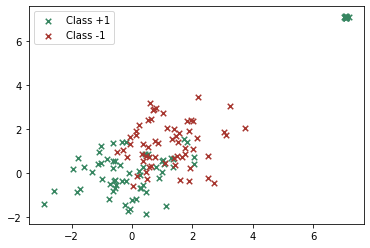

In [4]:
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()